In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [2]:
data=pd.read_csv(r'C:\Users\user\Downloads\googleplaystore.csv')

In [3]:
data["Reviews"] = data["Reviews"].astype("int64")

In [4]:
#Changing size column

In [4]:
#converting size to mb
def convert_size(size):
    if size == 'Varies with device':
        return np.nan
    elif size.endswith('M'):
        value = float(size[:-1])
        return value * 1
    elif size.endswith('k'):
        value = float(size[:-1])
        return value / 1024
    else:
        return float(size)

# Apply the conversion function to the 'Size' column
data['Size'] = data['Size'].apply(convert_size)

# Print the updated 'Size' column
print(data['Size'])

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64


In [5]:
#converting installs to numerical,removing +
column_values=data['Installs']
for i in range(len(column_values)):
    value=column_values[i]
    modified_value=int(value.rstrip('+').replace(',',''))
    column_values[i]=modified_value
    data['Installs']=column_values

C:\Users\user\AppData\Local\Temp\ipykernel_10080\2857241713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_values[i]=modified_value


In [6]:
 data['Installs'].astype(int)

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: int32

In [8]:
data.shape

(10841, 12)

In [9]:
#convert the price data to float

In [7]:
data['Price']=data['Price'].str.replace('$','').astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_10080\3018123431.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price']=data['Price'].str.replace('$','').astype(float)


In [11]:
#converting LastUpdated colum to YYYY

In [12]:
#converting reviews to int

In [8]:
data["Reviews"] = data["Reviews"].astype("int64")

In [14]:
#Combining mature 17+ and adult only 18+

In [9]:
data["Content Rating"].replace("Adults only 18+", "Mature 17+", inplace =True)

In [10]:
#the genre column is changed to genre only
data["Genres"] = data["Genres"].str.split(";").str[0]
data["Genres"].replace("Music & Audio", "Music ", inplace =True)


In [11]:
data['Genres'].astype(str)

0             Art & Design
1             Art & Design
2             Art & Design
3             Art & Design
4             Art & Design
               ...        
10836            Education
10837            Education
10838              Medical
10839    Books & Reference
10840            Lifestyle
Name: Genres, Length: 10841, dtype: object

In [12]:
#last updated column converted to DD_MM_YYY
data["Last Updated"] = pd.to_datetime(data["Last Updated"])

In [13]:
# Assuming 'date' column contains the "dd-mm-yyyy" formatted dates
# Convert 'date' column to pandas datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'], format='%d-%m-%Y')

# Extract the year from the 'date' column and store it in a new column 'year'
data['Last Updated'] = data['Last Updated'].dt.year

In [15]:
data.isna().sum()

Category             1
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Text(0.5, 1.0, 'Scatter Plot: Reviews vs. Rating')

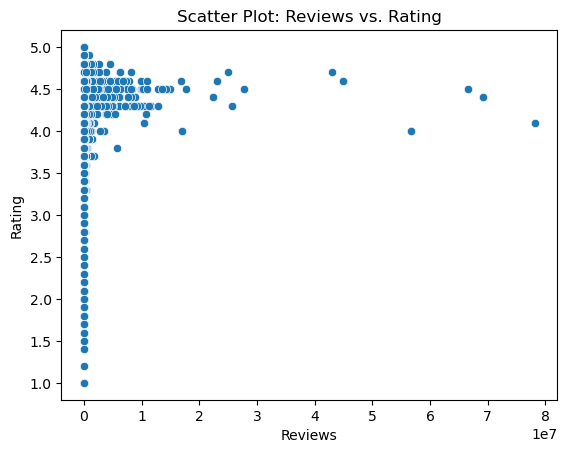

In [16]:
x_data=data['Reviews']
y_data=data['Rating']
sns.scatterplot(x=x_data,y=y_data)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Scatter Plot: Reviews vs. Rating')

Text(0.5, 1.0, 'Scatter Plot: Installs vs. Rating')

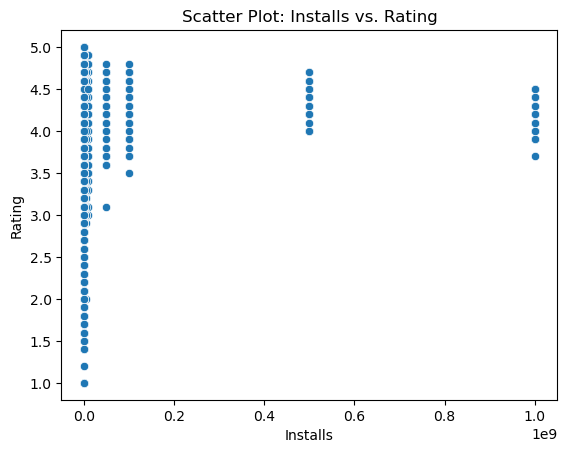

In [22]:
x_data=data['Installs']
y_data=data['Rating']
sns.scatterplot(x=x_data,y=y_data)
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Scatter Plot: Installs vs. Rating')

C:\Users\user\AppData\Local\Temp\ipykernel_10080\2909463098.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[numeric_features].corr()


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

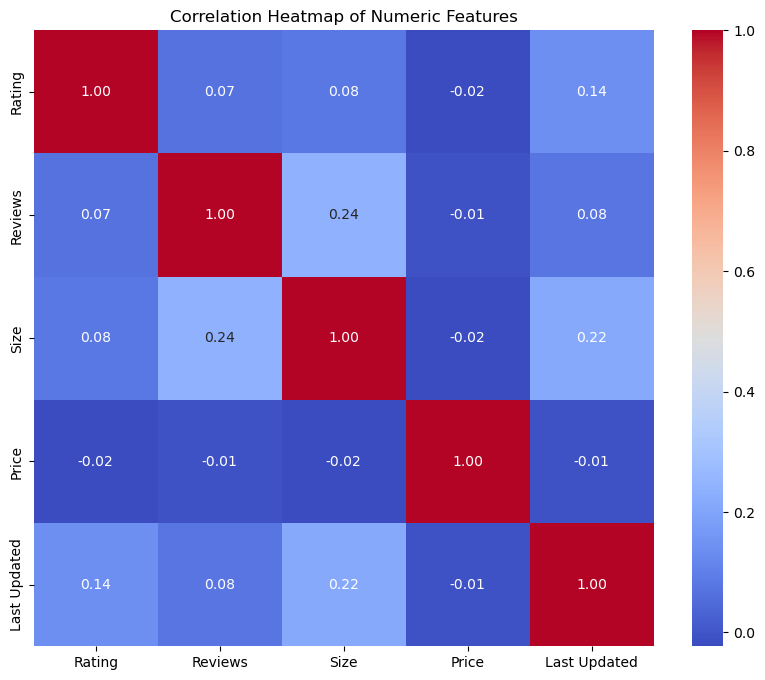

In [17]:
numeric_features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price','Last Updated']

# Create a correlation matrix for the selected numeric features
correlation_matrix = data[numeric_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')

In [18]:
data['Installs']=data['Installs'].astype(int)

In [19]:
data.dropna(subset=['Category'], inplace=True)

In [20]:
data.isna().sum()

Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [21]:
#Seperating the data with null rating
null_rating_mask = data['Rating'].isnull()

# Step 2: Create a separate dataset containing rows with null values for 'Rating'
null_rating_data = data[null_rating_mask]

# Step 3: Create a separate dataset containing rows without null values for 'Rating'
nonnull_data = data[~null_rating_mask]

In [22]:
# Calculate the median size for each category
category_median_size = nonnull_data.groupby('Category')['Size'].transform('median')

# Replace missing 'Size' values with the median size of their respective categories
nonnull_data['Size'].fillna(category_median_size, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10080\1571791810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data['Size'].fillna(category_median_size, inplace=True)


In [23]:
nonnull_data['Last Updated'].value_counts()

2018    6508
2017    1498
2016     651
2015     388
2014     190
2013      94
2012      21
2011      15
2010       1
Name: Last Updated, dtype: int64

In [30]:
nonnull_data['Category'].value_counts()

FAMILY                                     1747
GAME                                       1097
TOOLS                                       734
PRODUCTIVITY                                351
MEDICAL                                     350
COMMUNICATION                               328
FINANCE                                     323
SPORTS                                      319
PHOTOGRAPHY                                 317
LIFESTYLE                                   314
PERSONALIZATION                             314
BUSINESS                                    303
HEALTH_AND_FITNESS                          297
SOCIAL                                      259
SHOPPING                                    238
NEWS_AND_MAGAZINES                          233
TRAVEL_AND_LOCAL                            226
DATING                                      195
BOOKS_AND_REFERENCE                         178
VIDEO_PLAYERS                               160
EDUCATION                               

In [24]:
# Step 1: Compute the value counts of each category in the 'Category' column
category_counts = nonnull_data['Category'].value_counts()

# Step 2: Select the top 11 most frequently occurring categories
top_frequent_categories = category_counts.nlargest(11).index

# Step 3: Replace all categories not in the top 11 with "Other"
nonnull_data.loc[~nonnull_data['Category'].isin(top_frequent_categories), 'Category'] = "Other"

In [25]:
nonnull_data['Category'].value_counts()

Other              3172
FAMILY             1747
GAME               1097
TOOLS               734
PRODUCTIVITY        351
MEDICAL             350
COMMUNICATION       328
FINANCE             323
SPORTS              319
PHOTOGRAPHY         317
LIFESTYLE           314
PERSONALIZATION     314
Name: Category, dtype: int64

In [33]:
nonnull_data.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [34]:
nonnull_data.shape

(9367, 12)

In [35]:
nonnull_data.tail()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FAMILY,4.0,7,2.60,500,Free,0.0,Everyone,Education,2017,1.0.0,4.1 and up
10836,FAMILY,4.5,38,53.00,5000,Free,0.0,Everyone,Education,2017,1.48,4.1 and up
10837,FAMILY,5.0,4,3.60,100,Free,0.0,Everyone,Education,2018,1,4.1 and up
10839,Other,4.5,114,7.15,1000,Free,0.0,Mature 17+,Books & Reference,2015,Varies with device,Varies with device
10840,LIFESTYLE,4.5,398307,19.00,10000000,Free,0.0,Everyone,Lifestyle,2018,Varies with device,Varies with device


In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
# Convert Categorical Columns to String Type (Optional, if not done already)
nonnull_data['Category'] = nonnull_data['Category'].astype(str)
nonnull_data['Type'] = nonnull_data['Type'].astype(str)

# Initialize the OneHotEncoder
ohe_category = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_type = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and Transform the 'Category' and 'Type' columns
encoded_category = ohe_category.fit_transform(nonnull_data[['Category']])
encoded_type = ohe_type.fit_transform(nonnull_data[['Type']])

# Get unique feature names after one-hot encoding for category and type
category_names = ohe_category.get_feature_names_out(['Category'])
type_names = ohe_type.get_feature_names_out(['Type'])

# Create DataFrames with the encoded columns and feature names
encoded_category_df = pd.DataFrame(encoded_category, columns=category_names, index=nonnull_data.index)
encoded_type_df = pd.DataFrame(encoded_type, columns=type_names, index=nonnull_data.index)

# Concatenate the encoded DataFrames with the original DataFrame (excluding 'Category' and 'Type' columns)
data_encoded = pd.concat([nonnull_data.drop(['Category', 'Type'], axis=1), encoded_category_df, encoded_type_df], axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_10080\842801521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data['Category'] = nonnull_data['Category'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_10080\842801521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data['Type'] = nonnull_data['Type'].astype(str)
C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be remove

In [38]:
data_encoded.shape

(9367, 24)

In [39]:
data_encoded.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating',
       'Genres', 'Last Updated', 'Current Ver', 'Android Ver',
       'Category_COMMUNICATION', 'Category_FAMILY', 'Category_FINANCE',
       'Category_GAME', 'Category_LIFESTYLE', 'Category_MEDICAL',
       'Category_Other', 'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SPORTS', 'Category_TOOLS',
       'Type_Free', 'Type_Paid'],
      dtype='object')

In [40]:
data_encoded.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,...,Category_LIFESTYLE,Category_MEDICAL,Category_Other,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SPORTS,Category_TOOLS,Type_Free,Type_Paid
0,4.1,159,19.0,10000,0.0,Everyone,Art & Design,2018,1.0.0,4.0.3 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.9,967,14.0,500000,0.0,Everyone,Art & Design,2018,2.0.0,4.0.3 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.7,87510,8.7,5000000,0.0,Everyone,Art & Design,2018,1.2.4,4.0.3 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.5,215644,25.0,50000000,0.0,Teen,Art & Design,2018,Varies with device,4.2 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,967,2.8,100000,0.0,Everyone,Art & Design,2018,1.1,4.4 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
data_encoded.head()


,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,...,Category_LIFESTYLE,Category_MEDICAL,Category_Other,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SPORTS,Category_TOOLS,Type_Free,Type_Paid
0,4.1,159,19.0,10000,0.0,Everyone,Art & Design,2018,1.0.0,4.0.3 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.9,967,14.0,500000,0.0,Everyone,Art & Design,2018,2.0.0,4.0.3 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.7,87510,8.7,5000000,0.0,Everyone,Art & Design,2018,1.2.4,4.0.3 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.5,215644,25.0,50000000,0.0,Teen,Art & Design,2018,Varies with device,4.2 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,967,2.8,100000,0.0,Everyone,Art & Design,2018,1.1,4.4 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
data_encoded.shape

(9366, 24)

In [31]:
scaler = MinMaxScaler()
columns_to_scale = [ 'Size','Reviews','Installs']

# Fit and transform the selected columns
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])



In [32]:
data_encoded['Last Updated'].value_counts()

2018    6508
2017    1498
2016     651
2015     388
2014     190
2013      94
2012      21
2011      15
2010       1
Name: Last Updated, dtype: int64

In [33]:
ordered_years = ['2010', '2011', '2012', '2013','2014','2015','2016','2017','2018']
data_encoded['Last Updated'] = data_encoded['Last Updated'].astype(str)
data_encoded['Last Updated'] = data_encoded['Last Updated'].apply(lambda x: ordered_years.index(x))

In [34]:

data_encoded.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,...,Category_LIFESTYLE,Category_MEDICAL,Category_Other,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SPORTS,Category_TOOLS,Type_Free,Type_Paid
0,4.1,0.000002,0.189933,0.00001,0.0,Everyone,Art & Design,8,1.0.0,4.0.3 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.9,0.000012,0.139929,0.00050,0.0,Everyone,Art & Design,8,2.0.0,4.0.3 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.7,0.001120,0.086924,0.00500,0.0,Everyone,Art & Design,8,1.2.4,4.0.3 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.5,0.002759,0.249938,0.05000,0.0,Teen,Art & Design,8,Varies with device,4.2 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,0.000012,0.027919,0.00010,0.0,Everyone,Art & Design,8,1.1,4.4 and up,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
columns_to_drop = ['Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
data_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)

In [36]:
X=data_encoded.drop('Rating',axis=1)
Y=data_encoded['Rating']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

In [40]:
print(mean_squared_error(Y_test,y_pred))
print(r2_score(Y_test,y_pred))

0.2415742503030916
0.02867652886884331


In [41]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(X_train,Y_train)
Y_pred=dt_reg.predict(X_test)

In [42]:
#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression



# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a model instance
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, Y, cv=kfold, scoring='r2')

# Print the R-squared value for each fold
for fold_num, score in enumerate(scores, start=1):
    print(f"Fold {fold_num} R-squared value: {score:.2f}")

# Calculate and print the average R-squared value
average_r2 = scores.mean()
print(f"Average R-squared value: {average_r2:.2f}")

Fold 1 R-squared value: 0.03
Fold 2 R-squared value: 0.05
Fold 3 R-squared value: 0.03
Fold 4 R-squared value: 0.03
Fold 5 R-squared value: 0.04
Average R-squared value: 0.04


In [43]:
#SVMR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_regressor.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = svm_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) as a metric
mse = mean_squared_error(Y_test, Y_pred)

In [44]:
mse


0.24611471831520065

In [45]:
from sklearn.metrics import  r2_score

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

R2 Score: 0.010420182654176768


In [47]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(X_train,Y_train)
Y_pred=dt_reg.predict(X_test)

In [48]:
# Calculate mean squared error on training data
mse_train = mean_squared_error(Y_train, dt_reg.predict(X_train))
print('Mean Squared Error on Training Data:', mse_train)

# Calculate mean squared error on test data
mse_test = mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error on Test Data:', mse_test)

Mean Squared Error on Training Data: 0.005840214502657555
Mean Squared Error on Test Data: 0.4124083167283424


In [49]:
mse_test = mean_squared_error(Y_test, Y_pred)
rmse_test = mean_squared_error(Y_test, Y_pred, squared=False)
mae_test = mean_absolute_error(Y_test, Y_pred)
r2_test = r2_score(Y_test, Y_pred)


In [50]:
print('Mean Squared Error (MSE) on Test Data:', mse_test)
print('Root Mean Squared Error (RMSE) on Test Data:', rmse_test)
print('Mean Absolute Error (MAE) on Test Data:', mae_test)
print('R-squared (R2) on Test Data:', r2_test)

Mean Squared Error (MSE) on Test Data: 0.4124083167283424
Root Mean Squared Error (RMSE) on Test Data: 0.6421902496366185
Mean Absolute Error (MAE) on Test Data: 0.4111372046683746
R-squared (R2) on Test Data: -0.6582143056444971


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, Y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

In [69]:
#Hyperparameter tuning

In [ ]:
param_dist = {
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['squared_error','poisson','friedman_mse','absolute_error']  # Include both criteria for the search
}

rf_regressor = RandomForestRegressor(random_state=42)

n_iter_search = 20  # Number of parameter settings that are sampled
random_search = RandomizedSearchCV(
    rf_regressor, param_distributions=param_dist,
    n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error',
    random_state=42, n_jobs=-1
)

# Fit the random search model to your data
random_search.fit(X, Y)

print("Best Parameters:", random_search.best_params_)
best_rf_model = random_search.best_estimator_


In [ ]:
#the output obtained is Best Parameters: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 90, 'criterion': 'squared_error', 'bootstrap': True}

In [ ]:
#applying the obtained parameters
hyperparameters = {
    'n_estimators': 200,
    'criterion': 'squared_error',
    'max_depth': 90,
    'min_samples_split': 8,
    'min_samples_leaf': 7,
    'max_features': 'log2',
    'bootstrap': True}
model=RandomForestRegressor (**hyperparameters)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

# Calculate evaluation metrics
mse1 = mean_squared_error(Y_test, prediction)
rmse1 = mean_squared_error(Y_test, prediction, squared=False)
mae1 = mean_absolute_error(Y_test, prediction)
r2new = r2_score(Y_test, prediction)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("Mean Absolute Error (MAE):", mae1)
print("R-squared (R2):", r2new)



In [ ]:
from sklearn.model_selection import GridSearchCV
best_estimator = random_search.best_estimator_

param_grid = {
    'criterion': [best_estimator.criterion],
    'max_depth': [best_estimator.max_depth],
    'max_features': [best_estimator.max_features],
    'min_samples_leaf': [best_estimator.min_samples_leaf,
                         best_estimator.min_samples_leaf + 2,
                         best_estimator.min_samples_leaf + 4],
    'min_samples_split': [best_estimator.min_samples_split - 2,
                          best_estimator.min_samples_split - 1,
                          best_estimator.min_samples_split,
                          best_estimator.min_samples_split + 1,
                          best_estimator.min_samples_split + 2],
    'n_estimators': [best_estimator.n_estimators - 200,
                     best_estimator.n_estimators - 100,
                     best_estimator.n_estimators,
                     best_estimator.n_estimators + 100,
                     best_estimator.n_estimators + 200]
}

print(param_grid)


In [ ]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf,param_grid =param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

In [ ]:
#the output obtained is {'criterion': ['squared_error'], 'max_depth': [90], 'max_features': ['log2'], 'min_samples_leaf': [7, 9, 11], 'min_samples_split': [6, 7, 8, 9, 10], 'n_estimators': [0, 100, 200, 300, 400]}

In [ ]:
 param_grid= {
    'n_estimators': 400,
    'criterion': 'squared_error',
    'max_depth': 90,
    'min_samples_split': 6,
    'min_samples_leaf': 7,
    'max_features': 'log2',
    'bootstrap': True}
model=RandomForestRegressor (**param_grid)
model.fit(X_train, Y_train)
prediction3 = model.predict(X_test)

# Calculate evaluation metrics
mse3 = mean_squared_error(Y_test, prediction3)
rmse3 = mean_squared_error(Y_test, prediction3, squared=False)
mae3 = mean_absolute_error(Y_test, prediction3)
r2grid3 = r2_score(Y_test, prediction3)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse3)
print("Root Mean Squared Error (RMSE):", rmse3)
print("Mean Absolute Error (MAE):", mae3)
print("R-squared (R2):", r2grid3)

In [ ]:
param_grid= {
    'n_estimators': 100,
    'criterion': 'squared_error',
    'max_depth': 90,
    'min_samples_split': 9,
    'min_samples_leaf': 9,
    'max_features': 'log2',
    'bootstrap': True}
model=RandomForestRegressor (**param_grid)
model.fit(X_train, Y_train)
prediction2 = model.predict(X_test)

# Calculate evaluation metrics
mse2 = mean_squared_error(Y_test, prediction2)
rmse2 = mean_squared_error(Y_test, prediction2, squared=False)
mae2 = mean_absolute_error(Y_test, prediction2)
r2grid = r2_score(Y_test, prediction2)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("Mean Absolute Error (MAE):", mae2)
print("R-squared (R2):", r2grid)